# Lead Scoring 

## Logistic Regression

## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as‘Hot Leads'. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
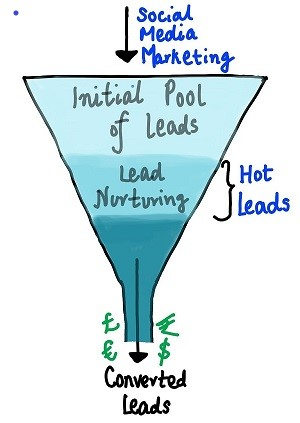


Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

Select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Reading and Understanding the Data

In [4]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5) 

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### checking duplicates

In [6]:
sum(data.duplicated(subset = 'Prospect ID'))

0

#### No duplicate values present

In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [9]:
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Data Cleaning

#### We can observe multiple rows containing select, which is equivalent to NaN.

In [10]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [11]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

As we can see there are multiple categories with just one entry, we can combine it to form one category

In [12]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [13]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [14]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [15]:
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [16]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Column Lead Profile, How did you hear about X Education have, Asymmetrique Activity Index, Lead Quality,Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score > 45% as null

In [17]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
# dropping the columns having more than 45% NA values.
data = data.drop(['Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality','How did you hear about X Education'], 1)

In [19]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### City

In [20]:
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [21]:
data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

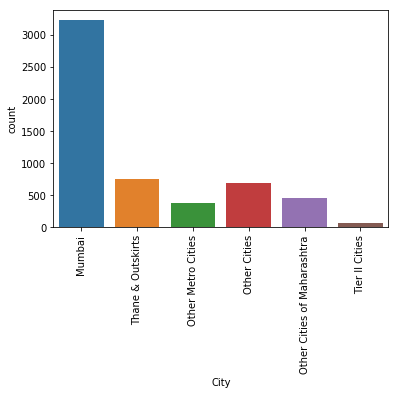

In [22]:
sns.countplot(data.City)
xticks(rotation = 90)

#### Since, Mumbai occurs most of the time we can replace the NaN with it

In [23]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')

#### Specailization

In [24]:
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [25]:
data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

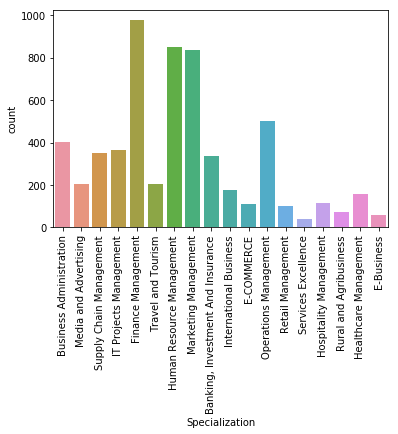

In [26]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

#### we can make a category "Others" for missing values in Specialization. 

In [27]:
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [28]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Tags

In [29]:
data.Tags.describe()

count                                    5887
unique                                     13
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [30]:
data.Tags.value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Other_Tags                              283
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
invalid number                           83
wrong number given                       47
Name: Tags, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

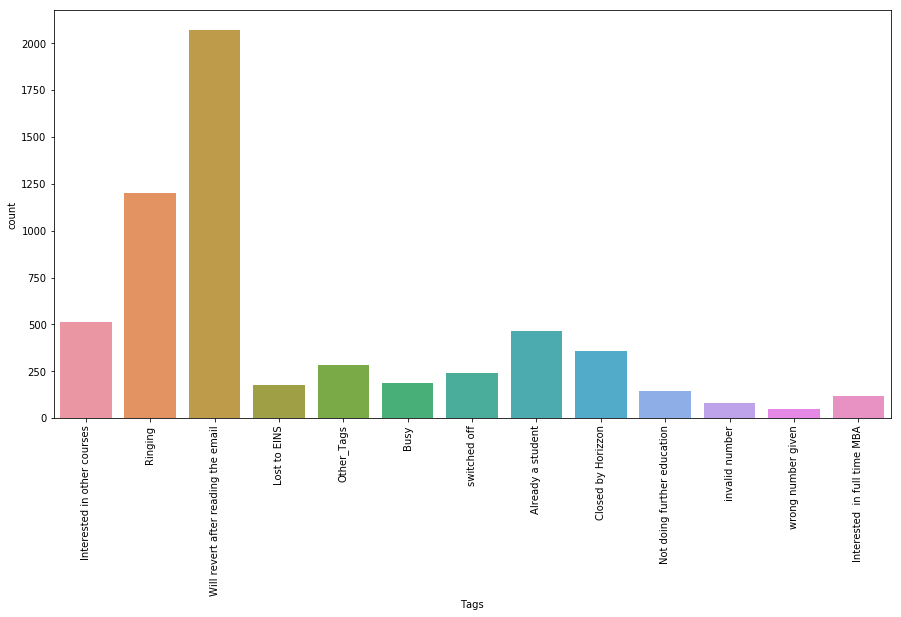

In [31]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)

#### Blanks in the tag column may be imputed by 'Will revert after reading the email'.

In [32]:
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')

#### What matters most to you in choosing a course

In [33]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [34]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Blanks in the this column may be imputed by 'Better Career Prospects'.

In [35]:
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#### Occupation

In [36]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [37]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### NaN in "What is your current occupation" can be imputed with "Unemployed".

In [38]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

#### Country

In [39]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Italy                      2
China                      2
Ghana                      2
Belgium                    2
Bangladesh                 2
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Indonesia                  1
Liberia                    1
Sri Lanka                  1
Denmark                    1
Malaysia                   1
Vietnam                    1
Tanzania      

In [40]:
data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

#### Country is India for most values so let's impute the same in missing values.

In [41]:
data['Country'] = data['Country'].replace(np.nan, 'India')

In [42]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### We can drop the rest of the missing values as it is insignificant

In [43]:
data.dropna(inplace = True)

In [44]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [45]:
data.to_csv('Leads_cleaned')

In [46]:
data.shape

(9074, 30)

In [47]:
1 -(9074/9240)

0.017965367965367962

#### After imputing/Droping the NaN, we have lost 2% of the data

# Exploratory Data Analytics

## Univariate Analysis

### Converted

#### We can compute the ratio of Convertred to not-converted

In [48]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

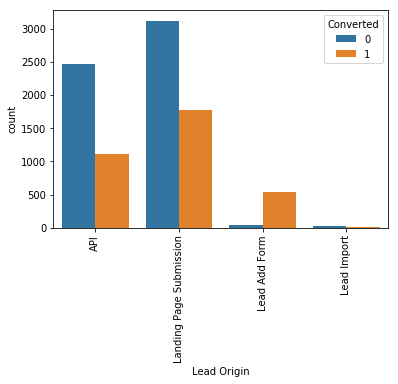

In [49]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

### Lead Source

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

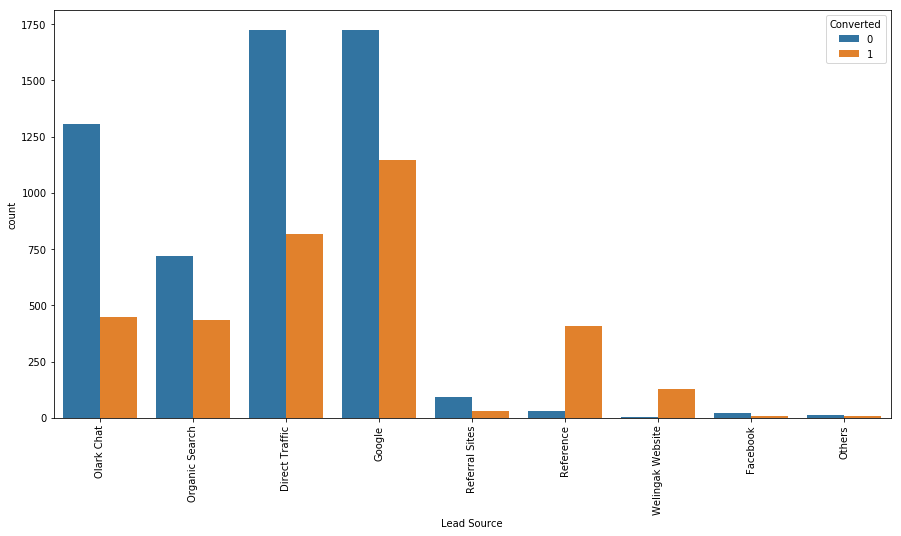

In [50]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

### Do Not Email & Do Not Call

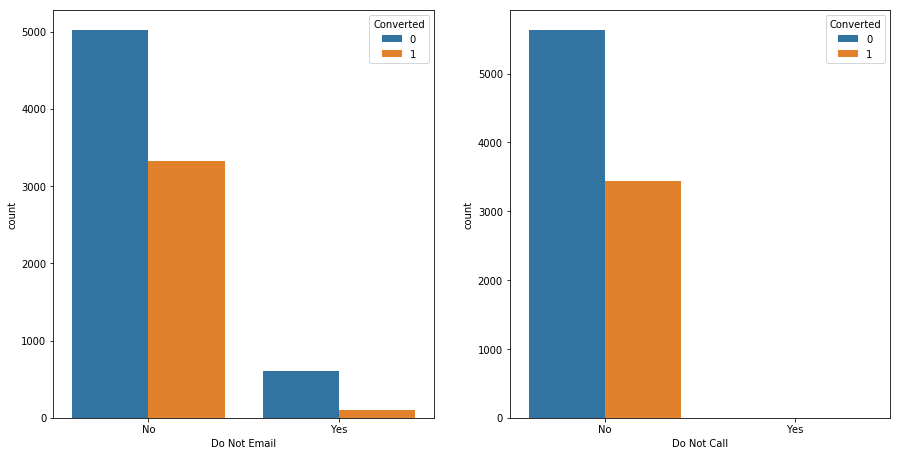

In [51]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

### Total Visits

In [52]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

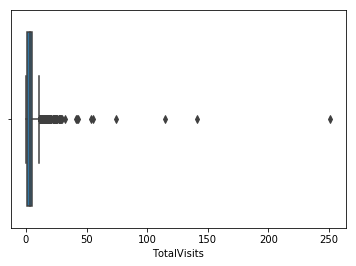

In [53]:
sns.boxplot(data['TotalVisits'])

#### Total vist consists of outliers which should be handled

In [54]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

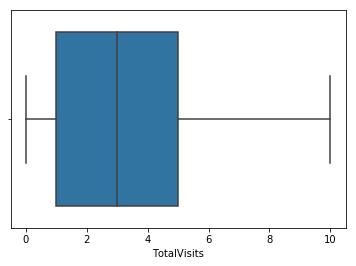

In [55]:
sns.boxplot(data['TotalVisits'])

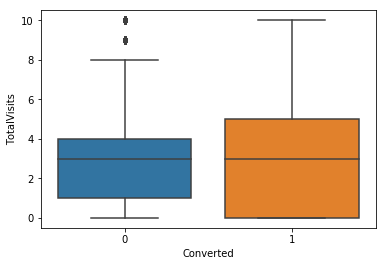

In [56]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

### Total time spent on website

In [57]:
data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

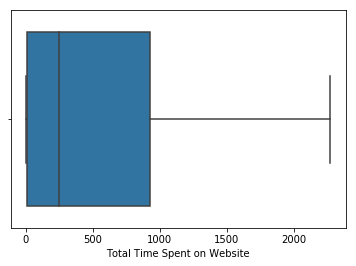

In [58]:
sns.boxplot(data['Total Time Spent on Website'])

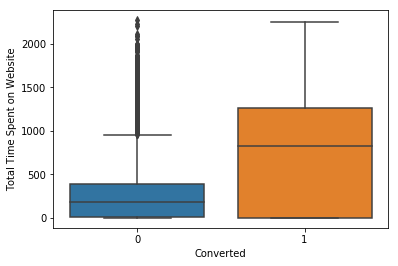

In [59]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

### Page views per visit

In [60]:
data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

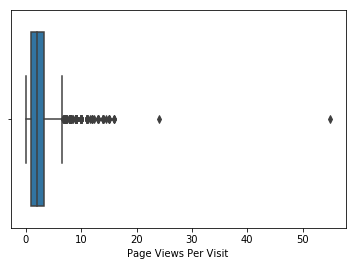

In [61]:
sns.boxplot(data['Page Views Per Visit'])

#### 'Page Views Per Visit' consists of outliers which should be handled

In [62]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

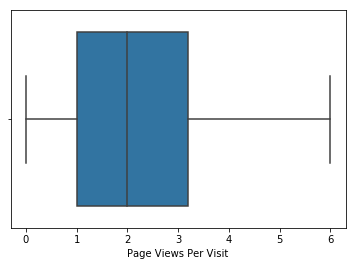

In [63]:
sns.boxplot(data['Page Views Per Visit'])

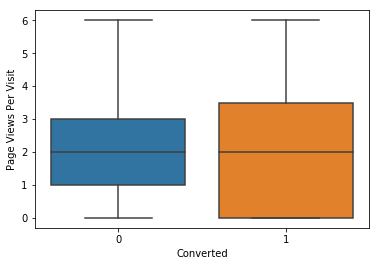

In [64]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

### Last Activity

In [65]:
data['Last Activity'].describe()

count             9074
unique              11
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

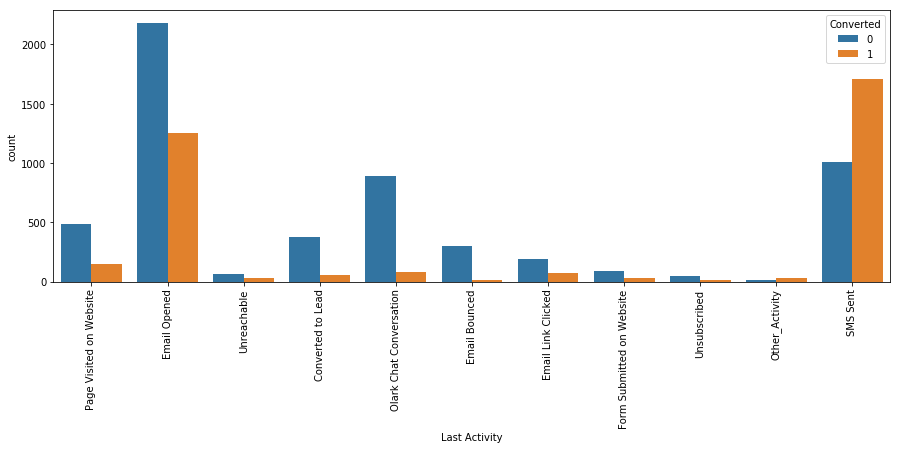

In [66]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

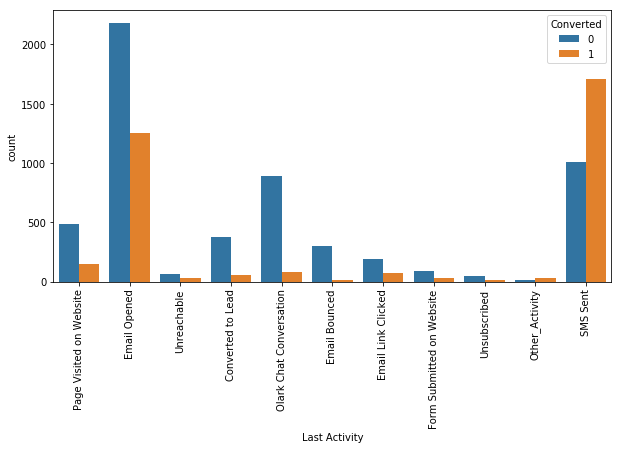

In [67]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

### Country

In [68]:
data.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

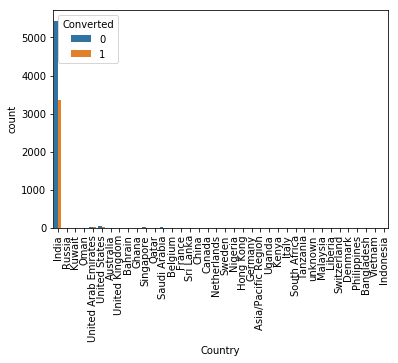

In [69]:
sns.countplot(x = "Country", hue = "Converted", data = data)
xticks(rotation = 90)

### Specialization

In [70]:
data.Specialization.describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [71]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

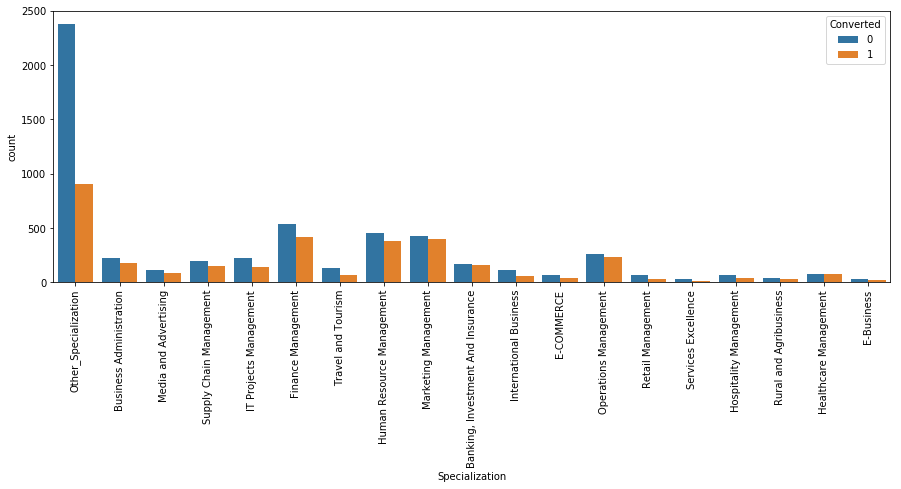

In [72]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

### Occupation

In [73]:
data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

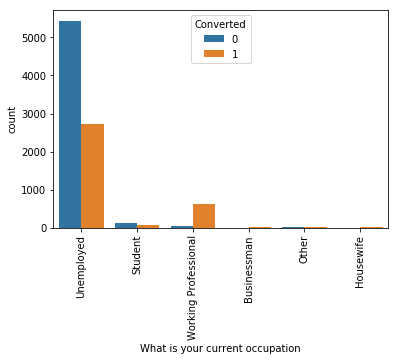

In [74]:
sns.countplot(x = 'What is your current occupation', hue = "Converted", data = data)
xticks(rotation = 90)

In [75]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

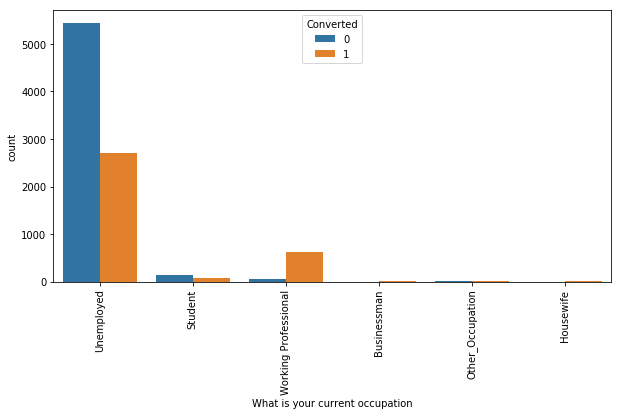

In [76]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

### What matters most to you in choosing a course

In [77]:
data['What matters most to you in choosing a course'].describe()


count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

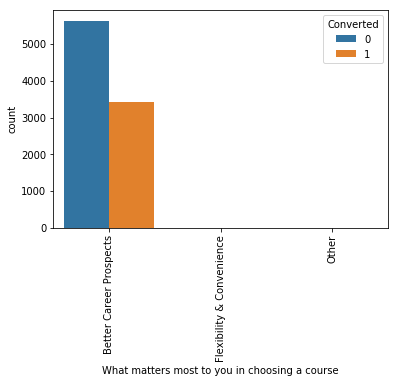

In [78]:
sns.countplot(x = 'What matters most to you in choosing a course', hue = "Converted", data = data)
xticks(rotation = 90)

#### Tags

In [79]:
data.Tags.describe()

count                                    9074
unique                                     13
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

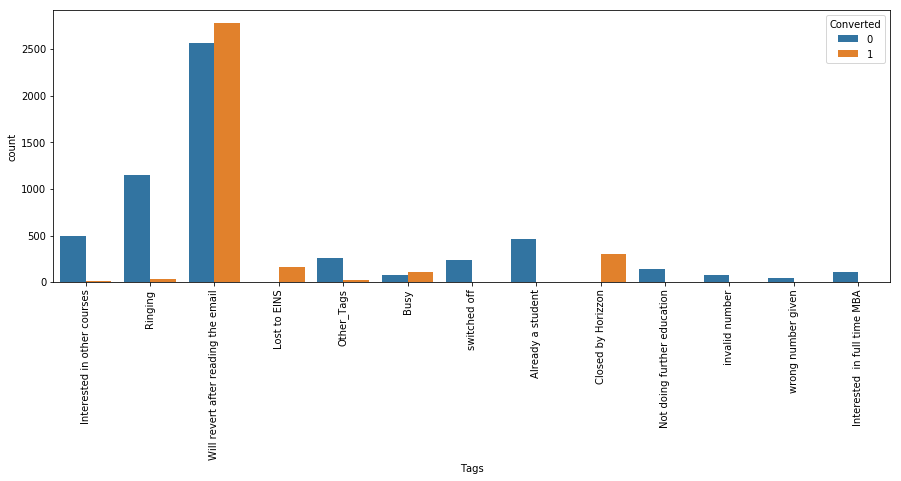

In [80]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

### City

In [81]:
data.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

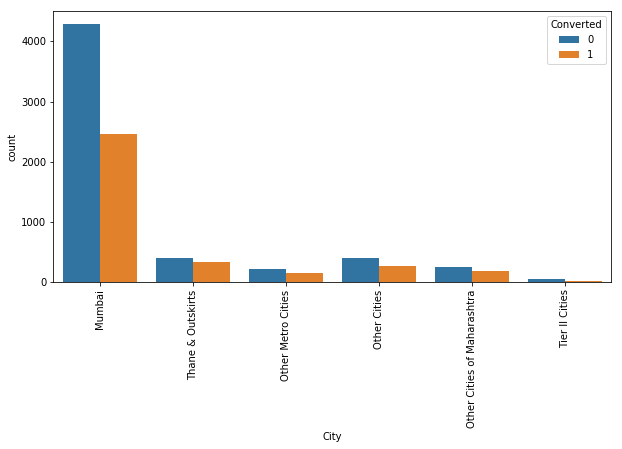

In [82]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

### Last Notable Activity

In [83]:
data['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

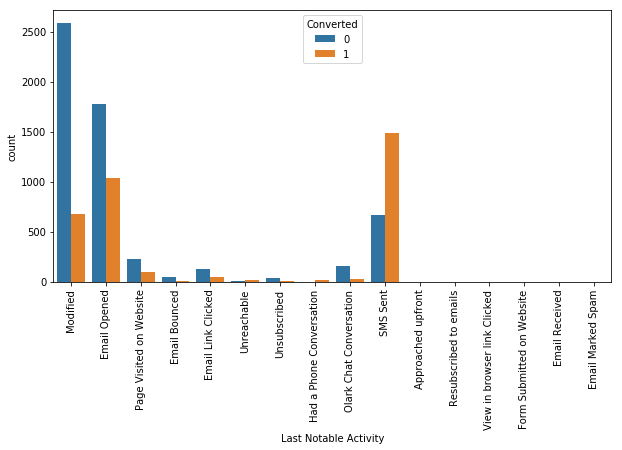

In [84]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## Results

__Based on the univariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis__

In [85]:
data.shape

(9074, 30)

In [86]:
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Other_Specialization                      Unemployed   
1   India     Other_Specialization                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No  Mumbai                                       No   
1                        No  Mumbai                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of 

In [87]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

### Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [88]:
varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

data[varlist] = data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [89]:
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
dummy1.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Specialization_Business Administration  Specialization_E-Business  \
0  

In [90]:
data = pd.concat([data, dummy1], axis=1)
data.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags    City Last Notable Activity  \
0          Interested in other courses  Mumbai              Modified   
1                              Ringing  Mumbai          Email Opened   
2  Will revert after reading the email  Mumbai          Email Opened   
3                              Ringing  Mumbai              Modified   
4  Will revert after reading the email  Mumbai              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                      

In [91]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City','Last Notable Activity'], axis = 1)

In [92]:
data.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0   

In [95]:
alldata = data.drop('Prospect ID',axis=1,inplace=False)
alldata.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                  

In [97]:
alldata.shape

(9074, 82)

In [108]:
alldata.describe()

Do Not Email  Do Not Call    Converted  TotalVisits  \
count   9074.000000  9074.000000  9074.000000  9074.000000   
mean       0.078907     0.000220     0.378554     3.191867   
std        0.269608     0.014845     0.485053     2.780618   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     3.000000   
75%        0.000000     0.000000     1.000000     5.000000   
max        1.000000     1.000000     1.000000    10.000000   

       Total Time Spent on Website  Page Views Per Visit  \
count                  9074.000000           9074.000000   
mean                    482.887481              2.265943   
std                     545.256560              1.790991   
min                       0.000000              0.000000   
25%                      11.000000              1.000000   
50%                     246.000000              2.000000   
75%                     922.750000              3.200000   
max                    2272.000000              6.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9074.000000                9074.000000   
mean                              0.538351                   0.064029   
std                               0.498554                   0.244818   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
count              9074.000000           9074.000000         9074.000000   
mean                  0.003306              0.003416            0.316619   
std                   0.057407              0.058353            0.465183   
min                   0.000000              0.000000            0.000000   
25%                   0.000000              0.000000            0.000000   
50%                   0.000000              0.000000            0.000000   
75%                   0.000000              0.000000            1.000000   
max                   1.000000              1.000000            1.000000   

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count             9074.000000                 9074.000000         9074.000000   
mean                 0.193189                    0.127177            0.002535   
std                  0.394822                    0.333189            0.050285   
min                  0.000000                    0.000000            0.000000   
25%                  0.000000                    0.000000            0.000000   
50%                  0.000000                    0.000000            0.000000   
75%                  0.000000                    0.000000            0.000000   
max                  1.000000                    1.000000            1.000000   

       Lead Source_Reference  Lead Source_Referral Sites  \
count            9074.000000                 9074.000000   
mean                0.048821                    0.013776   
std                 0.215505                    0.116565   
min                 0.000000                    0.000000   
25%                 0.000000                    0.000000   
50%                 0.000000                    0.000000   
75%                 0.000000                    0.000000   
max                 1.000000                    1.000000   

       Lead Source_Welingak Website  Last Activity_Email Bounced  \
count                   9074.000000                  9074.000000   
mean                       0.014216                     0.034384   
std                        0.118389                     0.182223   
min                  

In [98]:
data.head()

Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0   

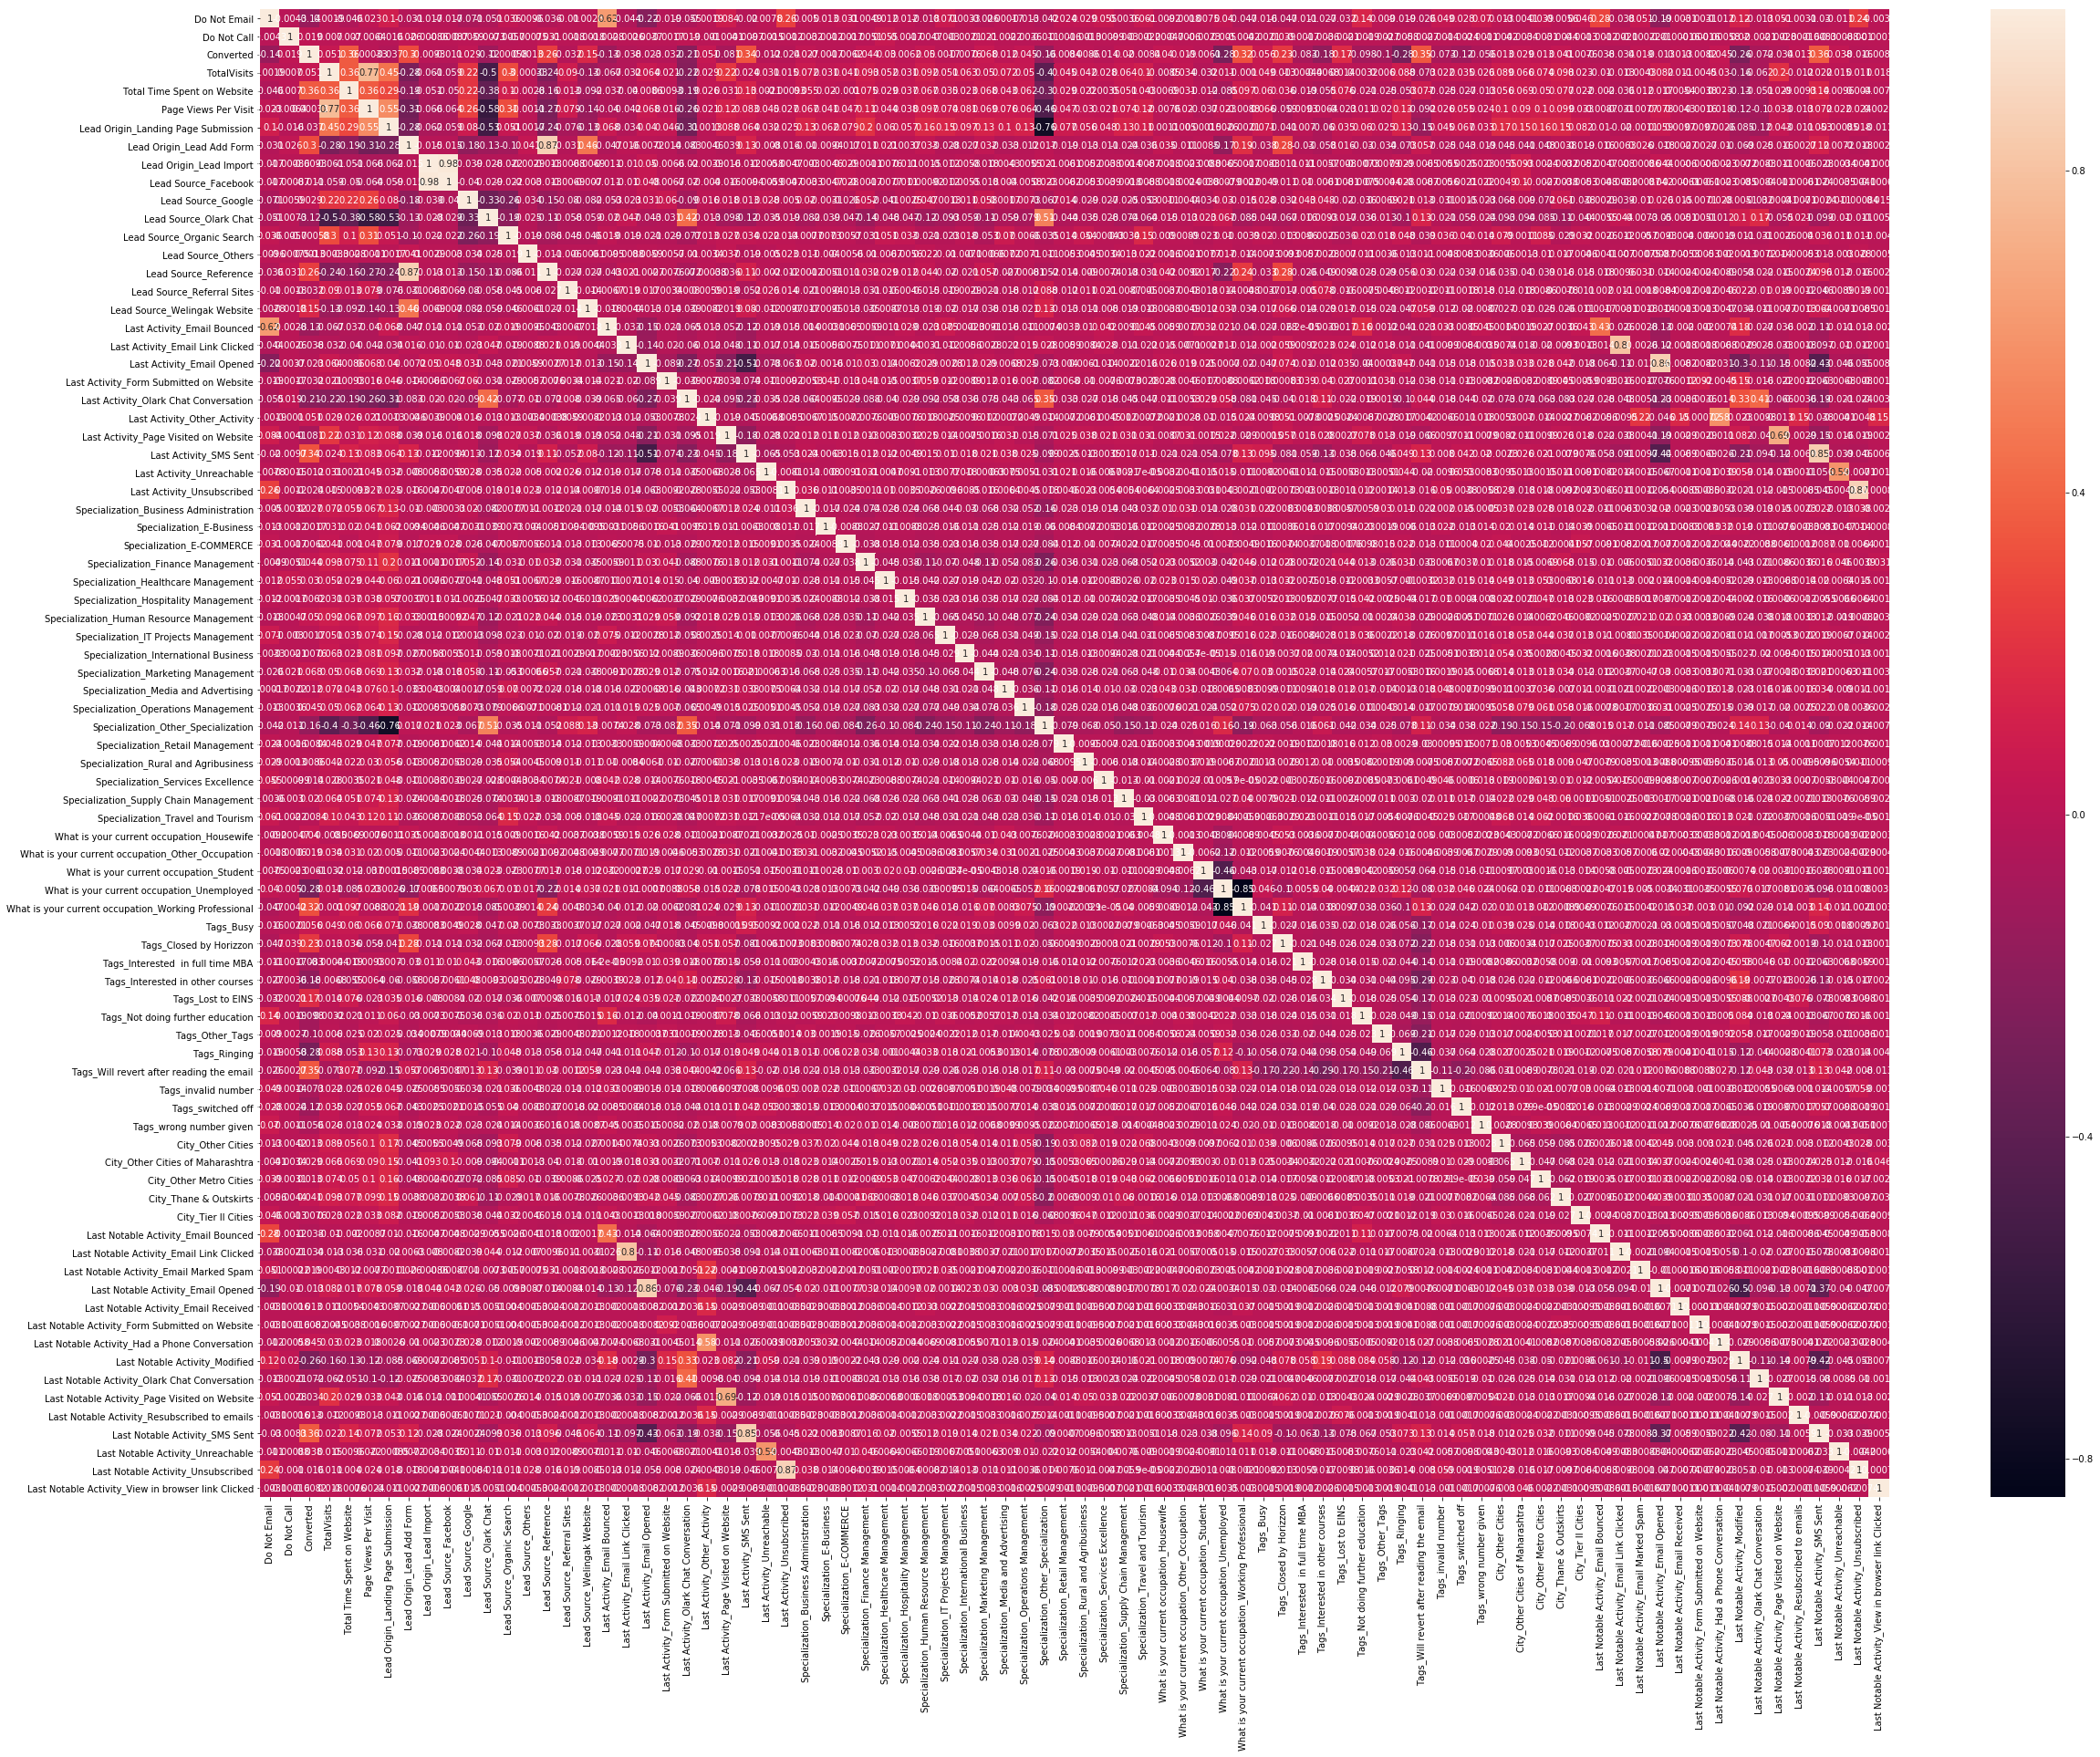

In [103]:
#Correlation Matrix
plt.figure(figsize = (40,30))
sns.heatmap(data.corr(),annot = True)

- Here, we see that there are variables which have correlation. These variables need to be taken care of through VIF during model building

## Model Building

### After the data cleaning and preapration teps above, we will build a Logistic Regression Model using the final dataset

The steps involved in the model building phase is:
- Standard Scaling the data
- Splitting the data into test and train
- Using RFE for variable selection
- Build the model and
- Based on p-value and VIF value, drop a few variables and re-build the model
- Do the above step iteratively inorder to arrive at the final Logistic Model

In [109]:
#Standard Scaling the data
from sklearn.preprocessing import StandardScaler
col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
alldata[col] = scaler.fit_transform(alldata[col])
alldata.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0    -1.147962   
1             0            0          0     0.650299   
2             0            0          1    -0.428657   
3             0            0          0    -0.788309   
4             0            0          1    -0.428657   

   Total Time Spent on Website  Page Views Per Visit  \
0                    -0.885664             -1.265259   
1                     0.350519              0.130693   
2                     1.924177             -0.148498   
3                    -0.326263             -0.706878   
4                     1.733431             -0.706878   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                  

In [115]:
#Importing the required packages for model building
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(alldata, train_size = 0.8, test_size = 0.2, random_state = 100)

In [116]:
#Splitting the data in Dependent and Independent Variables
y_train = df_train.pop('Converted')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

(7259,)
(7259, 81)


In [212]:
#Splitting the test data aslo into dependent and independent variables
y_test = df_test.pop('Converted')
X_test = df_test
print(y_test.shape)
print(X_test.shape)

(1815,)
(1815, 81)


In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#RFE taking 20 variables as variable count
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [119]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 10),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 47),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 56),
 ('Last Activity_Form Submitted on Website', False, 49),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 57),
 ('Last Activity_SMS Sent', Fa

In [120]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Other_Activity',
       'Specialization_Other_Specialization',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'],
      dtype='object')

### First Iteration of the Logistic Regression Model

### Model Building

In [151]:
#Importing the StatsAPI package for Logistic Regression Model
import statsmodels.api as sm

In [152]:
#Building the first iteration of the model
X_train_rfe1 = X_train[col]
X_train_lm1 = sm.add_constant(X_train_rfe1)
log1= sm.GLM(y_train,X_train_lm1, family = sm.families.Binomial())
m1 = log1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7238
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1933.7
Date:                Fri, 23 Aug 2019   Deviance:                       3867.4
Time:                        17:11:46   Pearson chi2:                 1.55e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4480      0.329     -4.403      0.000      -2.093      -0.803
Do Not Email                                            -1.6957      0.208     -8.168      0.000      -2.103      -1.289
Total Time Spent on Website                              1.0241      0.045     22.708      0.000       0.936       1.113
Lead Origin_Landing Page Submission                     -1.6387      0.148    -11.058      0.000      -1.929      -1.348
Lead Origin_Lead Add Form                                2.4526      0.305      8.029      0.000       1.854       3.051
Lead Source_Welingak Website                             2.4638      0.799      3.084      0.002       0.898       4.030
Last Activity_Other_Activity                             1.8684      0.623      2.999      0.003       0.647       3.089
Specialization_Other_Specialization                     -1.6060      0.149    -10.815      0.000      -1.897      -1.315
What is your current occupation_Unemployed              -1.5180      0.293     -5.180      0.000      -2.092      -0.944
What is your current occupation_Working Professional     1.0778      0.377      2.857      0.004       0.338       1.817
Tags_Busy                                                2.8815      0.303      9.521      0.000       2.288       3.475
Tags_Closed by Horizzon                                  8.4025      0.751     11.194      0.000       6.931       9.874
Tags_Lost to EINS                                        7.8831      0.628     12.545      0.000       6.651       9.115
Tags_Ringing                                            -1.2712      0.305     -4.169      0.000      -1.869      -0.674
Tags_Will revert after reading the email                 3.6915      0.202     18.239      0.000       3.295       4.088
Tags_invalid number                                    -23.0782   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                                       -1.2877      0.576     -2.234      0.025      -2.417      -0.158
Tags_wrong number given                                -22.6122   2.94e+04     -0.001      0.999   -5.76e+04    5.75e+04
Last Notable Activity_Olark Chat Conversation           -1.3034      0.367     -3.555      0.000      -2.022      -0.585
Last Notable Activity_SMS Sent                           2.8206      0.115     24.458      0.000       2.595       3.047
Last Notable Activity_Unsubscribed                       2.1984      0.607      3.623      0.000       1.009       3.387
========================================================================================================================
"""

### Getting Model Accuracy

In [153]:
#Making Predictions
y_train_pred = m1.predict(X_train_lm1)
y_train_pred[:10]

160     0.519230
2267    0.043484
8895    0.737515
854     0.782940
3640    0.193176
7090    0.023924
4366    0.158432
6174    0.018688
857     0.661621
7264    0.143380
dtype: float64

In [154]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51923001, 0.04348427, 0.73751472, 0.78293964, 0.19317575,
       0.02392394, 0.15843237, 0.01868843, 0.66162119, 0.14337966])

In [155]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0      1    0.519230
1      0    0.043484
2      1    0.737515
3      1    0.782940
4      0    0.193176

In [156]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      1    0.519230          1
1      0    0.043484          0
2      1    0.737515          1
3      1    0.782940          1
4      0    0.193176          0

In [157]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

#Model Accuracy
print("Accuracy of the model is", round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted),3))

[[4181  314]
 [ 448 2316]]
Accuracy of the model is 0.895


### VIF Calculation

In [158]:
#Finding the VIF values of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7          What is your current occupation_Unemployed  11.26
2                 Lead Origin_Landing Page Submission   5.29
13           Tags_Will revert after reading the email   4.80
6                 Specialization_Other_Specialization   3.81
12                                       Tags_Ringing   1.89
3                           Lead Origin_Lead Add Form   1.89
8   What is your current occupation_Working Profes...   1.87
18                     Last Notable Activity_SMS Sent   1.56
4                        Lead Source_Welingak Website   1.37
10                            Tags_Closed by Horizzon   1.36
1                         Total Time Spent on Website   1.24
15                                  Tags_switched off   1.18
0                                        Do Not Email   1.18
9                                           Tags_Busy   1.16
11                                  Tags_Lost to EINS   1.13
14                                Tags_invalid number   1.07
19                 Last Notable Activity_Unsubscribed   1.07
17      Last Notable Activity_Olark Chat Conversation   1.05
16                            Tags_wrong number given   1.04
5                        Last Activity_Other_Activity   1.01

- First let us remove the variables with high p-value and check how the model is performing. So, in the next step we will do the second iteration of the model by removing "Tags_invalid number"	

### Second Iteration of the Model

In [167]:
#Building the second iteration of the model
X_train_rfe2 = X_train_rfe1.drop("Tags_invalid number",axis=1,inplace=False)
X_train_lm2 = sm.add_constant(X_train_rfe2)
log2 = sm.GLM(y_train,X_train_lm2, family = sm.families.Binomial())
m2 = log2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7239
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1938.0
Date:                Fri, 23 Aug 2019   Deviance:                       3876.0
Time:                        17:14:33   Pearson chi2:                 1.57e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5065      0.333     -4.526      0.000      -2.159      -0.854
Do Not Email                                            -1.6903      0.207     -8.151      0.000      -2.097      -1.284
Total Time Spent on Website                              1.0237      0.045     22.745      0.000       0.935       1.112
Lead Origin_Landing Page Submission                     -1.6548      0.149    -11.138      0.000      -1.946      -1.364
Lead Origin_Lead Add Form                                2.4585      0.306      8.024      0.000       1.858       3.059
Lead Source_Welingak Website                             2.4532      0.799      3.070      0.002       0.887       4.019
Last Activity_Other_Activity                             1.8751      0.627      2.992      0.003       0.647       3.103
Specialization_Other_Specialization                     -1.6153      0.149    -10.846      0.000      -1.907      -1.323
What is your current occupation_Unemployed              -1.5625      0.296     -5.278      0.000      -2.143      -0.982
What is your current occupation_Working Professional     1.0561      0.381      2.769      0.006       0.309       1.803
Tags_Busy                                                3.0126      0.300     10.025      0.000       2.424       3.602
Tags_Closed by Horizzon                                  8.5175      0.750     11.350      0.000       7.047       9.988
Tags_Lost to EINS                                        7.9988      0.628     12.733      0.000       6.768       9.230
Tags_Ringing                                            -1.1329      0.302     -3.749      0.000      -1.725      -0.541
Tags_Will revert after reading the email                 3.8093      0.201     18.908      0.000       3.414       4.204
Tags_switched off                                       -1.1486      0.575     -1.998      0.046      -2.276      -0.022
Tags_wrong number given                                -21.4729   1.78e+04     -0.001      0.999    -3.5e+04    3.49e+04
Last Notable Activity_Olark Chat Conversation           -1.3087      0.367     -3.567      0.000      -2.028      -0.590
Last Notable Activity_SMS Sent                           2.7941      0.114     24.487      0.000       2.570       3.018
Last Notable Activity_Unsubscribed                       2.1824      0.604      3.611      0.000       0.998       3.367
========================================================================================================================
"""

### Getting Model Accuracy

In [168]:
#Making Predictions
y_train_pred2 = m2.predict(X_train_lm2)
y_train_pred2[:10]

160     0.518786
2267    0.043506
8895    0.733498
854     0.782546
3640    0.193003
7090    0.023756
4366    0.158299
6174    0.017491
857     0.661164
7264    0.144102
dtype: float64

In [169]:
y_train_pred2 = y_train_pred2.values.reshape(-1)
y_train_pred2[:10]

array([0.51878598, 0.04350644, 0.73349812, 0.7825459 , 0.19300308,
       0.02375617, 0.15829892, 0.01749109, 0.66116368, 0.14410231])

In [170]:
y_train_pred_final2 = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred2})
y_train_pred_final2.head()

Churn  Churn_Prob
0      1    0.518786
1      0    0.043506
2      1    0.733498
3      1    0.782546
4      0    0.193003

In [171]:
y_train_pred_final2['predicted'] = y_train_pred_final2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final2.head()

Churn  Churn_Prob  predicted
0      1    0.518786          1
1      0    0.043506          0
2      1    0.733498          1
3      1    0.782546          1
4      0    0.193003          0

In [172]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final2.Churn, y_train_pred_final2.predicted )
print(confusion)

#Model Accuracy
print("Accuracy of the model is", round(metrics.accuracy_score(y_train_pred_final2.Churn, y_train_pred_final2.predicted),3))

[[4181  314]
 [ 446 2318]]
Accuracy of the model is 0.895


- Here we see that there is no change in the model accuracy

### VIF Calculation

In [173]:
#Finding the VIF values of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7          What is your current occupation_Unemployed  11.05
2                 Lead Origin_Landing Page Submission   5.28
13           Tags_Will revert after reading the email   4.60
6                 Specialization_Other_Specialization   3.81
3                           Lead Origin_Lead Add Form   1.89
8   What is your current occupation_Working Profes...   1.86
12                                       Tags_Ringing   1.84
17                     Last Notable Activity_SMS Sent   1.55
4                        Lead Source_Welingak Website   1.37
10                            Tags_Closed by Horizzon   1.35
1                         Total Time Spent on Website   1.24
0                                        Do Not Email   1.18
14                                  Tags_switched off   1.17
9                                           Tags_Busy   1.15
11                                  Tags_Lost to EINS   1.12
18                 Last Notable Activity_Unsubscribed   1.07
16      Last Notable Activity_Olark Chat Conversation   1.05
15                            Tags_wrong number given   1.04
5                        Last Activity_Other_Activity   1.01

### Third Iteration of the Model

In [175]:
#Building the second iteration of the model
X_train_rfe3 = X_train_rfe2.drop("Tags_wrong number given",axis=1,inplace=False)
X_train_lm3 = sm.add_constant(X_train_rfe3)
log3 = sm.GLM(y_train,X_train_lm3, family = sm.families.Binomial())
m3 = log3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.0
Date:                Fri, 23 Aug 2019   Deviance:                       3880.0
Time:                        17:16:09   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5388      0.335     -4.592      0.000      -2.196      -0.882
Do Not Email                                            -1.6918      0.207     -8.170      0.000      -2.098      -1.286
Total Time Spent on Website                              1.0239      0.045     22.753      0.000       0.936       1.112
Lead Origin_Landing Page Submission                     -1.6643      0.149    -11.184      0.000      -1.956      -1.373
Lead Origin_Lead Add Form                                2.4620      0.307      8.021      0.000       1.860       3.064
Lead Source_Welingak Website                             2.4485      0.799      3.064      0.002       0.882       4.015
Last Activity_Other_Activity                             1.8684      0.624      2.993      0.003       0.645       3.092
Specialization_Other_Specialization                     -1.6205      0.149    -10.862      0.000      -1.913      -1.328
What is your current occupation_Unemployed              -1.5872      0.298     -5.331      0.000      -2.171      -1.004
What is your current occupation_Working Professional     1.0444      0.384      2.723      0.006       0.293       1.796
Tags_Busy                                                3.0841      0.299     10.312      0.000       2.498       3.670
Tags_Closed by Horizzon                                  8.5819      0.750     11.438      0.000       7.111      10.052
Tags_Lost to EINS                                        8.0634      0.628     12.840      0.000       6.833       9.294
Tags_Ringing                                            -1.0586      0.300     -3.523      0.000      -1.648      -0.470
Tags_Will revert after reading the email                 3.8746      0.201     19.318      0.000       3.481       4.268
Tags_switched off                                       -1.0736      0.574     -1.870      0.061      -2.199       0.052
Last Notable Activity_Olark Chat Conversation           -1.3112      0.367     -3.571      0.000      -2.031      -0.592
Last Notable Activity_SMS Sent                           2.7820      0.114     24.503      0.000       2.559       3.005
Last Notable Activity_Unsubscribed                       2.1854      0.605      3.613      0.000       1.000       3.371
========================================================================================================================
"""

### Getting Model Accuracy

In [176]:
#Making Predictions
y_train_pred3 = m3.predict(X_train_lm3)
y_train_pred3[:10]

160     0.518532
2267    0.043525
8895    0.731707
854     0.782415
3640    0.192796
7090    0.023655
4366    0.158115
6174    0.016855
857     0.660963
7264    0.144463
dtype: float64

In [177]:
y_train_pred3 = y_train_pred3.values.reshape(-1)
y_train_pred3[:10]

array([0.51853172, 0.04352487, 0.7317067 , 0.78241519, 0.19279578,
       0.02365486, 0.15811495, 0.0168554 , 0.66096312, 0.14446331])

In [179]:
y_train_pred_final3 = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred3})
y_train_pred_final3.head()

Churn  Churn_Prob
0      1    0.518532
1      0    0.043525
2      1    0.731707
3      1    0.782415
4      0    0.192796

In [180]:
y_train_pred_final3['predicted'] = y_train_pred_final3.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final3.head()

Churn  Churn_Prob  predicted
0      1    0.518532          1
1      0    0.043525          0
2      1    0.731707          1
3      1    0.782415          1
4      0    0.192796          0

In [182]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final3.Churn, y_train_pred_final3.predicted )
print(confusion)

#Model Accuracy
print("Accuracy of the model is", round(metrics.accuracy_score(y_train_pred_final3.Churn, y_train_pred_final3.predicted),3))

[[4182  313]
 [ 448 2316]]
Accuracy of the model is 0.895


- Here we see that there is no change in the model accuracy

### VIF Calculation

In [183]:
#Finding the VIF values of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7          What is your current occupation_Unemployed  10.95
2                 Lead Origin_Landing Page Submission   5.28
13           Tags_Will revert after reading the email   4.50
6                 Specialization_Other_Specialization   3.81
3                           Lead Origin_Lead Add Form   1.89
8   What is your current occupation_Working Profes...   1.85
12                                       Tags_Ringing   1.81
16                     Last Notable Activity_SMS Sent   1.55
4                        Lead Source_Welingak Website   1.37
10                            Tags_Closed by Horizzon   1.35
1                         Total Time Spent on Website   1.24
0                                        Do Not Email   1.18
14                                  Tags_switched off   1.17
9                                           Tags_Busy   1.14
11                                  Tags_Lost to EINS   1.12
17                 Last Notable Activity_Unsubscribed   1.07
15      Last Notable Activity_Olark Chat Conversation   1.05
5                        Last Activity_Other_Activity   1.01

- In the above iteration, we see that the variable "Tags_switched off" has a p-value of 0.061 which is slightly higher than 0.05. Also, from the above VIF table we see that the variable "What is your current occupation_Unemployed" has VIF>10. So, in the next iteration let us drop the variable that is having high VIF 

### Fourth Iteration of the Model

In [184]:
#Building the fourth iteration of the model
X_train_rfe4 = X_train_rfe3.drop("What is your current occupation_Unemployed",axis=1,inplace=False)
X_train_lm4 = sm.add_constant(X_train_rfe4)
log4 = sm.GLM(y_train,X_train_lm4, family = sm.families.Binomial())
m4 = log4.fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1954.6
Date:                Fri, 23 Aug 2019   Deviance:                       3909.2
Time:                        17:27:45   Pearson chi2:                 1.54e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9646      0.218    -13.603      0.000      -3.392      -2.537
Do Not Email                                            -1.6791      0.206     -8.142      0.000      -2.083      -1.275
Total Time Spent on Website                              1.0271      0.045     22.881      0.000       0.939       1.115
Lead Origin_Landing Page Submission                     -1.6502      0.149    -11.089      0.000      -1.942      -1.359
Lead Origin_Lead Add Form                                2.4990      0.303      8.240      0.000       1.905       3.093
Lead Source_Welingak Website                             2.3967      0.798      3.005      0.003       0.834       3.960
Last Activity_Other_Activity                             1.8239      0.620      2.942      0.003       0.609       3.039
Specialization_Other_Specialization                     -1.6314      0.150    -10.896      0.000      -1.925      -1.338
What is your current occupation_Working Professional     2.5684      0.256     10.052      0.000       2.068       3.069
Tags_Busy                                                2.9402      0.296      9.949      0.000       2.361       3.519
Tags_Closed by Horizzon                                  8.4262      0.748     11.259      0.000       6.959       9.893
Tags_Lost to EINS                                        7.9343      0.626     12.672      0.000       6.707       9.161
Tags_Ringing                                            -1.2156      0.297     -4.094      0.000      -1.797      -0.634
Tags_Will revert after reading the email                 3.7410      0.196     19.097      0.000       3.357       4.125
Tags_switched off                                       -1.2272      0.572     -2.145      0.032      -2.348      -0.106
Last Notable Activity_Olark Chat Conversation           -1.2851      0.362     -3.553      0.000      -1.994      -0.576
Last Notable Activity_SMS Sent                           2.7632      0.113     24.454      0.000       2.542       2.985
Last Notable Activity_Unsubscribed                       2.1345      0.604      3.537      0.000       0.952       3.317
========================================================================================================================
"""

### Getting Model Accuracy

In [ ]:
X_train_lm4 = sm.add_constant(X_train_rfe4)

In [185]:
#Making Predictions
y_train_pred4 = m4.predict(X_train_lm4)
y_train_pred4[:10]

160     0.529765
2267    0.045229
8895    0.730786
854     0.790608
3640    0.199154
7090    0.023602
4366    0.163459
6174    0.004047
857     0.671390
7264    0.146214
dtype: float64

In [186]:
y_train_pred4 = y_train_pred4.values.reshape(-1)
y_train_pred4[:10]

array([0.52976541, 0.04522917, 0.73078612, 0.79060757, 0.19915376,
       0.02360247, 0.16345863, 0.00404728, 0.67138992, 0.14621391])

In [187]:
y_train_pred_final4 = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred4})
y_train_pred_final4.head()

Churn  Churn_Prob
0      1    0.529765
1      0    0.045229
2      1    0.730786
3      1    0.790608
4      0    0.199154

In [188]:
y_train_pred_final4['predicted'] = y_train_pred_final4.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final4.head()

Churn  Churn_Prob  predicted
0      1    0.529765          1
1      0    0.045229          0
2      1    0.730786          1
3      1    0.790608          1
4      0    0.199154          0

In [191]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final4.Churn, y_train_pred_final4.predicted )
print(confusion)

#Model Accuracy
print("Accuracy of the model is", round(metrics.accuracy_score(y_train_pred_final4.Churn, y_train_pred_final4.predicted),3))

[[4180  315]
 [ 454 2310]]
Accuracy of the model is 0.894


- Here we see that there is a very slight decrease in the model accuracy

### VIF Calculation

In [190]:
#Finding the VIF values of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12           Tags_Will revert after reading the email  3.39
2                 Lead Origin_Landing Page Submission  2.76
6                 Specialization_Other_Specialization  2.23
3                           Lead Origin_Lead Add Form  1.80
11                                       Tags_Ringing  1.59
15                     Last Notable Activity_SMS Sent  1.54
4                        Lead Source_Welingak Website  1.35
9                             Tags_Closed by Horizzon  1.28
7   What is your current occupation_Working Profes...  1.23
1                         Total Time Spent on Website  1.23
0                                        Do Not Email  1.18
13                                  Tags_switched off  1.13
8                                           Tags_Busy  1.10
10                                  Tags_Lost to EINS  1.08
16                 Last Notable Activity_Unsubscribed  1.07
14      Last Notable Activity_Olark Chat Conversation  1.05
5                        Last Activity_Other_Activity  1.01

- In the fourth iteration of the model we see that all the variables have p-value less than 0.05
- Also, the VIF values of all the variables is less than 5
- The variables that we got in the fourth iteration also make sense
- Even from the confusion matrix, we can see that the True Negatives and True Positives are higher than the false positives and false negatives, which is a good indicator that the model is doing a good job in predciting the values at 0.5 cut-off

## Deciding the model cut-off

In [196]:
#Creating probability and predicted  values for various probability cut-offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final4.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1    0.519230          1    1    1    1    1    1    1    0    0    0   
1      0    0.043484          0    1    0    0    0    0    0    0    0    0   
2      1    0.737515          1    1    1    1    1    1    1    1    1    0   
3      1    0.782940          1    1    1    1    1    1    1    1    1    0   
4      0    0.193176          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [197]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380769  1.000000  0.000000
0.1   0.1  0.727235  0.981187  0.571079
0.2   0.2  0.849015  0.920043  0.805339
0.3   0.3  0.892823  0.890738  0.894105
0.4   0.4  0.900537  0.874819  0.916352
0.5   0.5  0.894063  0.835745  0.929922
0.6   0.6  0.887312  0.794863  0.944160
0.7   0.7  0.877669  0.739146  0.962848
0.8   0.8  0.848051  0.633140  0.980200
0.9   0.9  0.829453  0.568017  0.990211


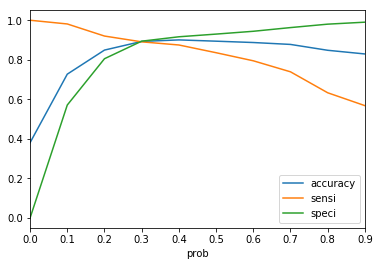

In [198]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Here we see that the probability cut-off of 0.3 is a good value to use in our scenario as we see that the sensitivity, sepcificity and accuracy plots are meeting at 0.3

### Plotting the ROC Curve

In [238]:
column = X_train_rfe4.columns

In [239]:
#Making Predictions on the test data using the 4th iteration of the model
X_test_cons = sm.add_constant(X_test[column])
y_test_pred = m4.predict(X_test_cons)
y_test_pred[:10]

3271    0.187117
1490    0.974298
7936    0.164488
4216    0.999134
3830    0.186263
1800    0.716701
6507    0.023343
4821    0.004206
4223    0.970620
4714    0.146214
dtype: float64

In [240]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.18711656, 0.97429805, 0.1644876 , 0.9991342 , 0.18626289,
       0.71670054, 0.0233434 , 0.00420642, 0.97061989, 0.14621391])

In [241]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()

Churn  Churn_Prob
0      0    0.187117
1      1    0.974298
2      0    0.164488
3      1    0.999134
4      0    0.186263

In [242]:
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.187117          0
1      1    0.974298          1
2      0    0.164488          0
3      1    0.999134          1
4      0    0.186263          0

In [243]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

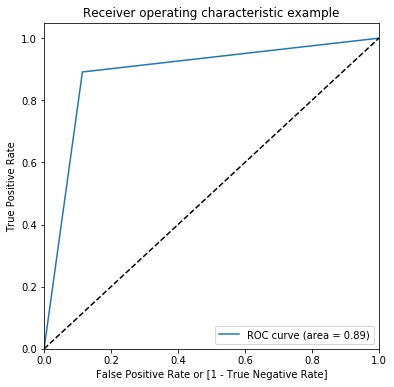

(array([0.        , 0.11451049, 1.        ]),
 array([0.        , 0.89120715, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [244]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.predicted)

## Building the model using PCA method

### Fitting the PCA on the cleaned data

In [199]:
#Doing a PCA on the cleaned data
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [200]:
#Fitting it to our data
pca.fit(alldata)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [201]:
pca.components_

array([[-1.04599387e-04,  1.02052861e-05,  4.94585671e-02, ...,
         7.48610022e-04,  7.91135407e-04,  4.26772013e-05],
       [-2.16939907e-02,  1.28504855e-04,  3.11191184e-01, ...,
         5.47248070e-04, -1.08373120e-03, -1.64145977e-04],
       [-6.56870225e-02,  5.72890032e-05, -3.07060178e-02, ...,
        -8.76771369e-04, -1.78208949e-03, -6.84774989e-05],
       ...,
       [ 1.29464819e-04, -1.93253467e-04,  2.19896577e-04, ...,
         3.35789950e-02,  3.54059470e-02, -3.73487460e-01],
       [ 1.43778036e-04, -1.31649678e-03,  5.30814701e-04, ...,
         1.95074439e-04, -1.90444922e-04, -3.49483342e-04],
       [ 8.14900934e-05, -9.37704264e-05, -6.14778375e-05, ...,
        -2.55975746e-01, -2.56837589e-01, -2.64874533e-01]])

### Calculating the explained variance ratio

In [202]:
#Checking explained variance ratios for the components we got above
pca.explained_variance_ratio_

array([3.12728211e-01, 1.14058858e-01, 7.80246609e-02, 6.02057464e-02,
       4.86795021e-02, 3.55933329e-02, 3.37820249e-02, 2.94728258e-02,
       2.44896334e-02, 1.65960382e-02, 1.51275238e-02, 1.37321674e-02,
       1.33666540e-02, 1.24300320e-02, 1.15513461e-02, 1.06790838e-02,
       1.04727039e-02, 9.91400098e-03, 9.64481837e-03, 9.28122878e-03,
       8.71361506e-03, 7.38061899e-03, 7.12241521e-03, 6.49395250e-03,
       6.20211939e-03, 6.02823199e-03, 5.63737608e-03, 5.25224211e-03,
       4.40388730e-03, 4.22544313e-03, 4.12451993e-03, 3.97567351e-03,
       3.83395892e-03, 3.45517250e-03, 3.10995378e-03, 3.00309874e-03,
       2.93775779e-03, 2.85414544e-03, 2.72053591e-03, 2.64784304e-03,
       2.44576908e-03, 2.41124104e-03, 2.37695864e-03, 2.19935160e-03,
       2.04490932e-03, 1.90233707e-03, 1.83831564e-03, 1.74903968e-03,
       1.64355621e-03, 1.61010541e-03, 1.53717156e-03, 1.51432023e-03,
       1.33955987e-03, 1.24974393e-03, 1.14981562e-03, 1.02586353e-03,
      

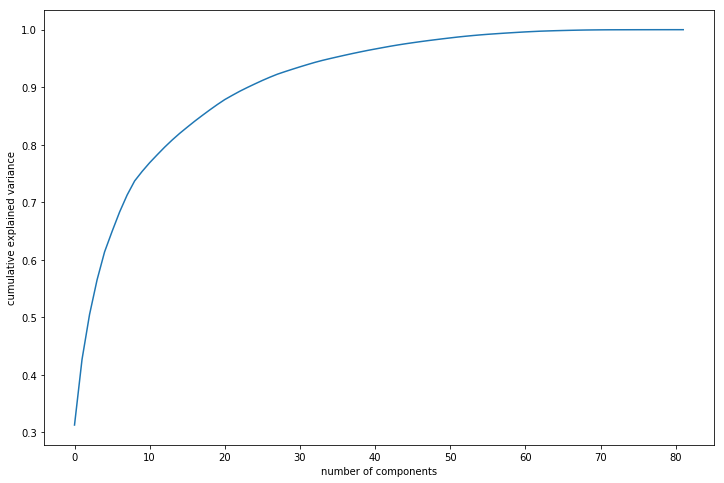

In [203]:
#Plotting the Scree Plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Here we see that 40 components are covering 96-98% of variance in our input data

### Fitting the final PCA

In [204]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [205]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(7259, 40)

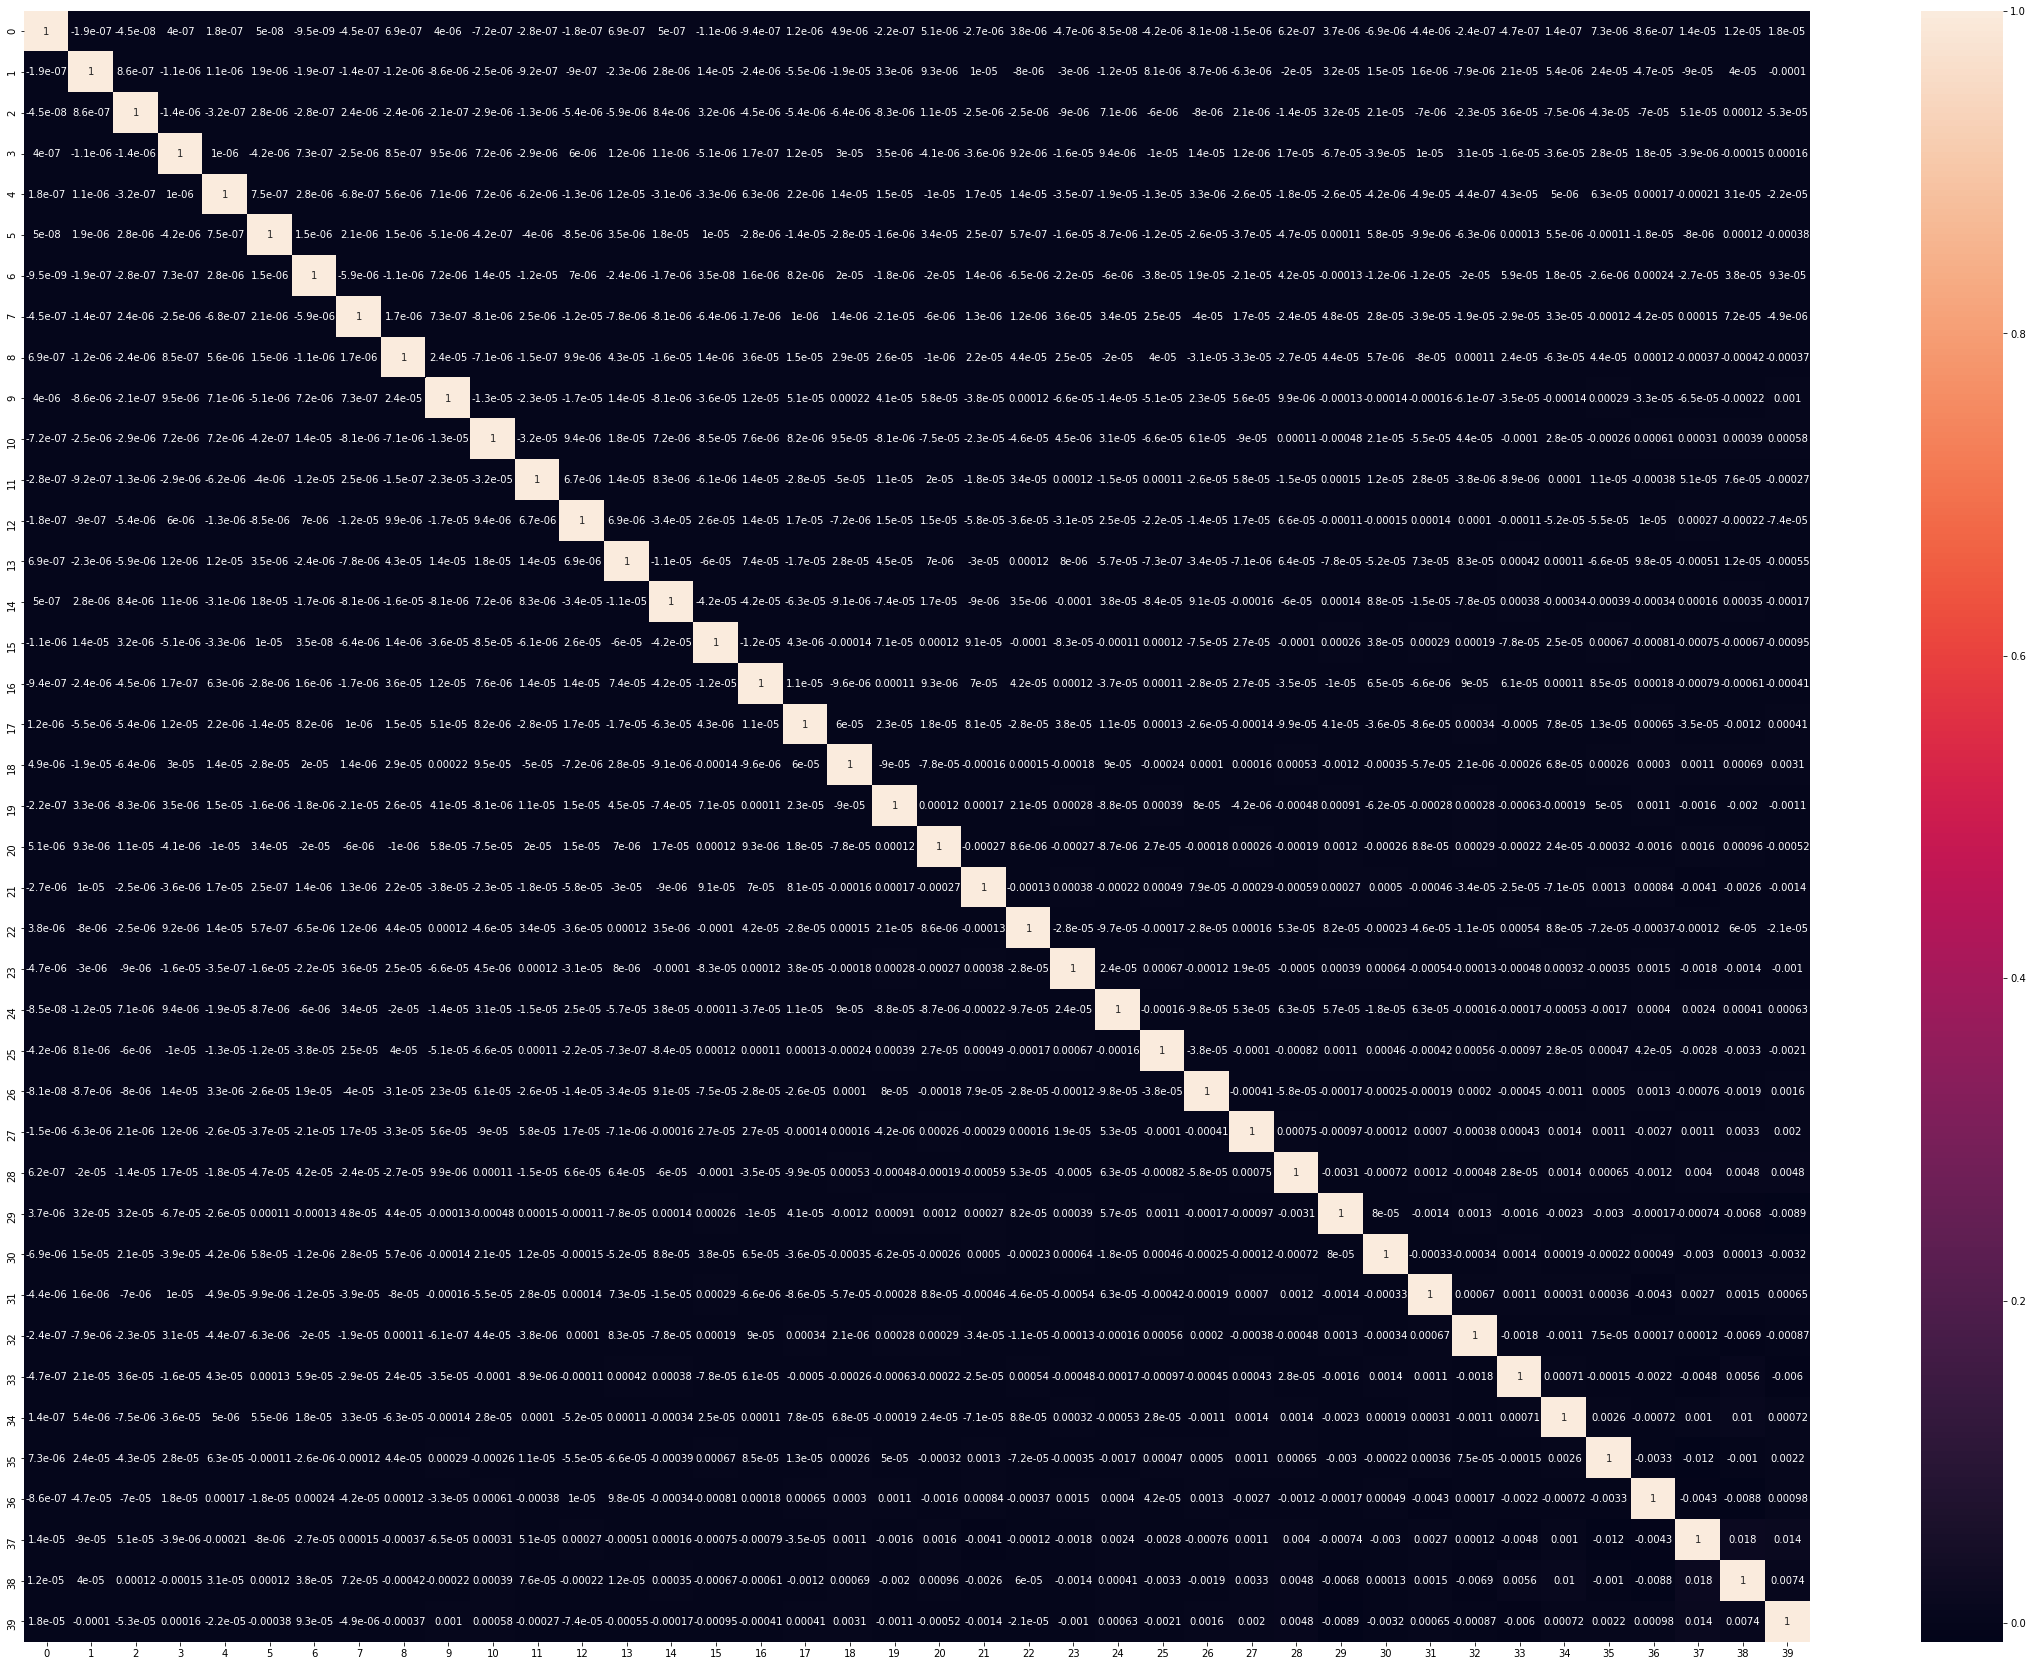

In [208]:
#Getting correlation and plotting the graph
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize = (40,30))
sns.heatmap(corrmat,annot = True)

- Here we see that there is no correlation among the variables

In [210]:
#Checking max and min values of correlation
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.017718983348033415 , min corr:  -0.011616833167534157


- Also, we see that the maximum and minimum values of correlation are very close to 0

In [213]:
#Applying PCA to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1815, 40)

In [214]:
#Training the model on the PCA train data
from sklearn.linear_model import LogisticRegression

logpca = LogisticRegression()
model_pca = logpca.fit(df_train_pca,y_train)

In [216]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.93'

In [219]:
pred_probs_test.shape

(1815,)

In [221]:
#Finding the probabilities on the train data as well
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
pred_probs_train.shape

(7259,)

In [222]:
y_train_pred_final_pca = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':pred_probs_train})
y_train_pred_final_pca.head()

Churn  Churn_Prob
0      1    0.611853
1      0    0.164710
2      1    0.755385
3      1    0.856566
4      0    0.254095

In [224]:
y_train_pred_final_pca['predicted'] = y_train_pred_final_pca.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final_pca.head()

Churn  Churn_Prob  predicted
0      1    0.611853          1
1      0    0.164710          0
2      1    0.755385          1
3      1    0.856566          1
4      0    0.254095          0

In [225]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_pca.Churn, y_train_pred_final_pca.predicted )
print(confusion)

#Model Accuracy
print("Accuracy of the model is", round(metrics.accuracy_score(y_train_pred_final_pca.Churn, y_train_pred_final_pca.predicted),3))

[[4170  325]
 [ 492 2272]]
Accuracy of the model is 0.887


## Deciding the cut-off for the model built using PCA

In [226]:
#Creating probability and predicted  values for various probability cut-offs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_pca[i]= y_train_pred_final_pca.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_pca.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      1    0.611853          1    1    1    1    1    1    1    1    0    0   
1      0    0.164710          0    1    1    0    0    0    0    0    0    0   
2      1    0.755385          1    1    1    1    1    1    1    1    1    0   
3      1    0.856566          1    1    1    1    1    1    1    1    1    1   
4      0    0.254095          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [227]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df_pca = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_pca.Churn, y_train_pred_final_pca[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df_pca.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df_pca)

     prob  accuracy     sensi     speci
0.0   0.0  0.380769  1.000000  0.000000
0.1   0.1  0.744042  0.972504  0.603560
0.2   0.2  0.802039  0.937048  0.719021
0.3   0.3  0.862240  0.879161  0.851835
0.4   0.4  0.883317  0.850579  0.903448
0.5   0.5  0.887450  0.821997  0.927697
0.6   0.6  0.879873  0.776411  0.943493
0.7   0.7  0.860862  0.698625  0.960623
0.8   0.8  0.828764  0.581042  0.981090
0.9   0.9  0.791707  0.469971  0.989544


### Plotting the Sensitivity, Specificity and Accuracy graphs

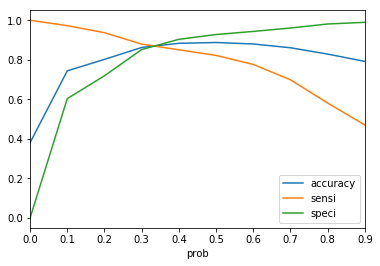

In [232]:
#Plotting the Sensitivtiy, Specificity and Accuracy graphs
cutoff_df_pca.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Here also we see that the probability cut-off of 0.3 is a good value to use in our scenario as we see that the sensitivity, sepcificity and accuracy plots are meeting at 0.3

In [230]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final_pca.Churn, y_train_pred_final_pca[0.3] )
print(confusion)

#Model Accuracy
print("Accuracy of the model is", round(metrics.accuracy_score(y_train_pred_final_pca.Churn, y_train_pred_final_pca[0.3]),3))

[[3829  666]
 [ 334 2430]]
Accuracy of the model is 0.862


In [245]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(1815, 40)

In [256]:
#Predicting the values for the PCA model
y_test_pred_pca = model_pca.predict_proba(df_test_pca)
y_test_pred_pca = y_test_pred_pca[:,1]
y_test_pred_pca

array([0.18710421, 0.98686578, 0.18573274, ..., 0.87816721, 0.05891178,
       0.28717401])

In [257]:
y_test_pred_final_pca = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred_pca})
y_test_pred_final_pca.head()

Churn  Churn_Prob
0      0    0.187104
1      1    0.986866
2      0    0.185733
3      1    0.996200
4      0    0.189004

In [258]:
y_test_pred_final_pca['predicted'] = y_test_pred_final_pca.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_test_pred_final_pca.head()

Churn  Churn_Prob  predicted
0      0    0.187104          0
1      1    0.986866          1
2      0    0.185733          0
3      1    0.996200          1
4      0    0.189004          0

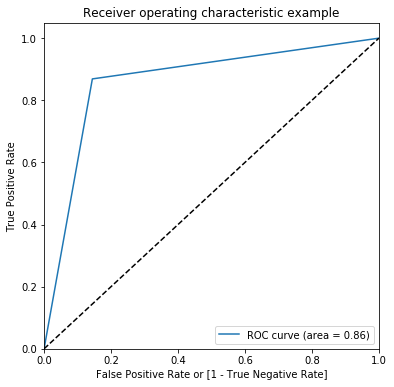

(array([0.        , 0.14423077, 1.        ]),
 array([0.        , 0.86885246, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [259]:
draw_roc(y_test_pred_final_pca.Churn, y_test_pred_final_pca.predicted)